# Prepare and load dataset

In [167]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
import cv2


from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import skimage
import warnings
warnings.filterwarnings('ignore')


In [168]:
x_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/train/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 1)


for img in glob.glob(r"/content/drive/MyDrive/datasets2/Covid19-dataset/train/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append( 2)




In [169]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Prepare and load data Test

In [170]:
x_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Covid/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Normal/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets2/Covid19-dataset/test/Viral Pneumonia/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append( 2)

# Create the base model from the pre-trained model Xception

In [171]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

                                            

In [172]:
base_model = Xception(include_top=False,weights='imagenet',input_shape=(x_train[0].shape))

In [173]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 32)   864         ['input_9[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 64, 64, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [174]:
conv_model = Model(inputs=base_model.input,
                   outputs=base_model.get_layer('block14_sepconv2_act').output)

In [175]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [176]:
train_ds = preprocess_input(x_train)
valid_ds = preprocess_input(x_valid) 
test_ds = preprocess_input(x_test)

In [177]:
flatten_layer = layers.Flatten()
dropout_layer_1 = layers.Dropout(0.5)

dense_layer_1 = layers.Dense(4096, activation='relu')
dense_layer_2 = layers.Dense(4096, activation='relu')
prediction_layer = layers.Dense(3, activation='softmax')

In [178]:
model = Sequential([
    conv_model,
    flatten_layer,
    dropout_layer_1,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

# fine-tuning

In [179]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [180]:
conv_model.trainable = True
set_trainable = False
for layer in conv_model.layers:
  if layer.name == 'block13_pool':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 32)   864         ['input_9[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 64, 64, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

In [181]:
print_layer_trainable()

False:	input_9
False:	block1_conv1
False:	block1_conv1_bn
False:	block1_conv1_act
False:	block1_conv2
False:	block1_conv2_bn
False:	block1_conv2_act
False:	block2_sepconv1
False:	block2_sepconv1_bn
False:	block2_sepconv2_act
False:	block2_sepconv2
False:	block2_sepconv2_bn
False:	conv2d_32
False:	block2_pool
False:	batch_normalization_32
False:	add_96
False:	block3_sepconv1_act
False:	block3_sepconv1
False:	block3_sepconv1_bn
False:	block3_sepconv2_act
False:	block3_sepconv2
False:	block3_sepconv2_bn
False:	conv2d_33
False:	block3_pool
False:	batch_normalization_33
False:	add_97
False:	block4_sepconv1_act
False:	block4_sepconv1
False:	block4_sepconv1_bn
False:	block4_sepconv2_act
False:	block4_sepconv2
False:	block4_sepconv2_bn
False:	conv2d_34
False:	block4_pool
False:	batch_normalization_34
False:	add_98
False:	block5_sepconv1_act
False:	block5_sepconv1
False:	block5_sepconv1_bn
False:	block5_sepconv2_act
False:	block5_sepconv2
False:	block5_sepconv2_bn
False:	block5_sepconv3_act
Fal

In [182]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_8 (Functional)        (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_8 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_7 (Dropout)         (None, 32768)             0         
                                                                 
 dense_24 (Dense)            (None, 4096)              134221824 
                                                                 
 dense_25 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_26 (Dense)            (None, 3)                 12291     
                                                                 
Total params: 171,876,907
Trainable params: 155,766,27

# Train the Network

In [183]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, validation_data= (x_valid,y_valid),  
                              epochs=100,
                            verbose=1,callbacks=[keras.callbacks.EarlyStopping
                               (monitor="val_loss",
                                patience=10,verbose=1,
                                restore_best_weights=True),
                               ])


Epoch 1/100
5/5 [==============================] - 5s 582ms/step - loss: 1.2344 - accuracy: 0.5127 - val_loss: 6.4454 - val_accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 0s 99ms/step - loss: 0.8660 - accuracy: 0.6456 - val_loss: 11.8653 - val_accuracy: 0.2500
Epoch 3/100
5/5 [==============================] - 0s 91ms/step - loss: 0.4537 - accuracy: 0.8228 - val_loss: 7.5700 - val_accuracy: 0.3571
Epoch 4/100
5/5 [==============================] - 0s 91ms/step - loss: 0.3363 - accuracy: 0.8608 - val_loss: 12.4535 - val_accuracy: 0.2500
Epoch 5/100
5/5 [==============================] - 0s 100ms/step - loss: 0.2391 - accuracy: 0.9177 - val_loss: 15.2523 - val_accuracy: 0.2500
Epoch 6/100
5/5 [==============================] - 0s 93ms/step - loss: 0.1620 - accuracy: 0.9241 - val_loss: 12.6589 - val_accuracy: 0.2500
Epoch 7/100
5/5 [==============================] - 0s 92ms/step - loss: 0.1075 - accuracy: 0.9684 - val_loss: 12.7841 - val_accuracy: 0.2500
Epoch 8/100
5

# plot the loss and accuracy of the model

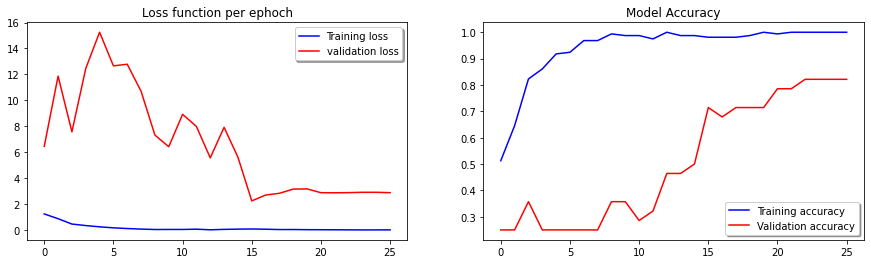

In [184]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Loss function per ephoch')
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Model Accuracy')
legend = ax[1].legend(loc='best', shadow=True)

# train & test loss and accuracy

In [185]:
train_loss, train_acc= model.evaluate(x_train,y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)

5/5 [==============================] - 0s 44ms/step - loss: 0.8133 - accuracy: 0.8418
train acc: 0.8417721390724182
train loss: 0.8132930994033813


In [186]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)

2/2 [==============================] - 0s 34ms/step - loss: 2.8299 - accuracy: 0.7115
test acc: 0.7115384340286255
test loss: 2.8298990726470947
